# Module 7: Introduction to Machine Learning
**Author: Caleb Sellinger**

**Githup Repo:** [Data Fundamentals M7](https://github.com/crsellinger/datafun-07-ml)

In [345]:
import jupyterlab as jpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns

## Part 1 - Chart a Straight Line
Below is a linear relationship. Plotting Fahrenheit temperatures and their corresponding Celsius temperatures produces a straight line

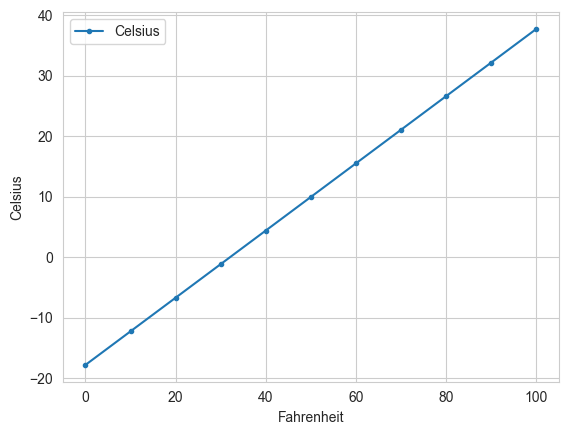

In [346]:
c = lambda f: 5/9 * (f-32)
temps = [(f,c(f)) for f in range(0,101,10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit',y='Celsius',style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition
Loading the average high temperature in January in NYC from 1895 to 2018 CSV file.

In [347]:
nyc_df = pd.read_csv("ave_hi_nyc_jan_1895-2018.csv")

### Section 2 - Data Inspection
Using the head and tail methods to view the new dataframe

In [348]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [349]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [350]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [351]:
# divide by 100 and floor to produce just the year
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

In [352]:
pd.set_option('display.precision', 2)
nyc_df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


### Section 5 - Build the Model

In [353]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope

np.float64(0.014771361132966163)

In [354]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict
Temperature prediction for 2024

In [355]:
# y = mx + b
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualization

(10.0, 70.0)

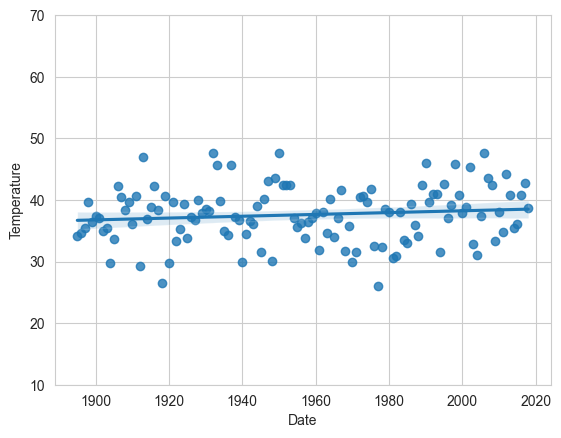

In [356]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [357]:
X_train, X_test, Y_train, Y_test = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11)
X_train.shape

(93, 1)

In [358]:
X_test.shape

(31, 1)

In [359]:
# Training the model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train,y=Y_train)

LinearRegression()

In [360]:
print(f"Slope: {linear_regression.coef_}")
print(f"Intercept: {linear_regression.intercept_}")

Slope: [0.01939167]
Intercept: -0.30779820252656975


### Section 2 - Test the Model

In [361]:
predict = linear_regression.predict(X_test)
expected = Y_test

for p, e in zip(predict[::5], expected[::5]):
    print(f"Predicted {p: .2f}, Expected: {e: .2f}")

Predicted  37.86, Expected:  31.70
Predicted  38.69, Expected:  34.80
Predicted  37.00, Expected:  39.40
Predicted  37.25, Expected:  45.70
Predicted  38.05, Expected:  32.30
Predicted  37.64, Expected:  33.80
Predicted  36.94, Expected:  39.70


### Section 3 - Predict

In [362]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

# Predicting the temperature for year 2024
print(f"Avg high for 2024: {predict(2024)}*F")

Avg high for 2024: [38.94094855]*F


### Section 4 - Visualizations

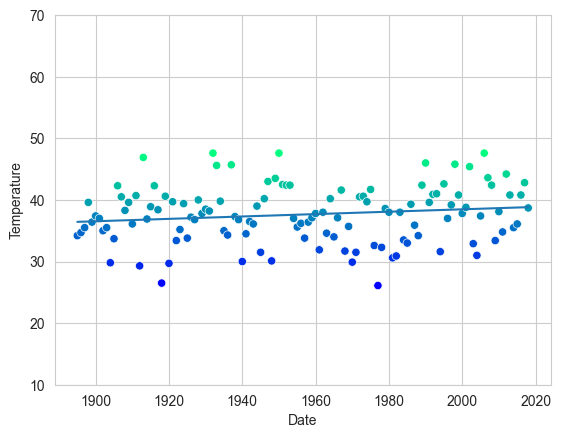

In [363]:
# Scatter plot
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

# Trendline
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)